In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [22]:
df1 = pd.read_csv('Outlet-a.csv') # Reading Data
df2 = pd.read_csv('Outlet-b.csv')
df3 = pd.read_csv('Outlet-c.csv')

df1 = df1.head(42996)
df2 = df2.head(60820)
df3 = df3.head(71594)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True)
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')
p.head(30)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


TransactionDateTime1           0       1       2       3       4       5   \
OutletNumber PumpNumber1                                                    
Outlet-a     1              78.60   74.03   30.81   31.19    2.07    2.13   
             4             369.48  157.19  114.84   31.07   26.72   82.14   
             5             905.46  417.63  222.92  259.65  243.23  430.40   
             10             53.05   30.80    2.92   22.37   15.51    3.63   
             11            955.73  645.80  407.89  461.59  432.91  748.42   
Outlet-b     2             803.73  437.38  201.03  277.07  304.14  200.08   
             3             646.89  468.36  336.25  342.17  422.70  538.85   
             6             872.12  318.61  151.78  147.99  121.83  277.38   
             7             112.51    4.14   26.49   15.98     NaN    0.00   
             9              83.81    4.96     NaN     NaN    5.03    2.10   
             11             72.08   32.04   42.16     NaN    1.50    0.00   
Outlet-c     1             547.35  330.93  252.02  270.01  367.92  224.31   
             2            1249.82  610.59  267.92  233.73  377.51  591.33   
             4            1682.53  860.19  543.41  370.72  337.91  351.14   
             11               NaN     NaN     NaN     NaN     NaN     NaN   

TransactionDateTime1           6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                      ...            
Outlet-a     1              42.24   123.38   358.12   942.61  ...  1020.68   
             4             419.42   835.95  1348.39  2290.46  ...  2192.00   
             5             733.27  1571.84  2303.15  2550.49  ...  2307.23   
             10             63.25    81.56   283.50   382.71  ...   453.00   
             11            262.28   201.66   215.67   324.03  ...   531.66   
Outlet-b     2             308.74   940.82  1454.78  1926.83  ...  1849.06   
             3             165.04   131.54   157.52   552.34  ...   648.65   
             6             944.87  1718.46  2162.13  2739.96  ...  2470.35   
             7             234.87   429.66   508.07  1321.43  ...  1493.17   
             9             194.48   486.97  1375.48  1853.45  ...  2159.77   
             11            291.17   750.11  1106.10  1485.55  ...  1778.31   
Outlet-c     1             505.76   938.65  1333.62  2245.27  ...  2835.15   
             2             848.18  1401.33  1571.42  2410.38  ...  2347.89   
             4            1198.30  1564.88  1921.78  3216.27  ...  2702.45   
             11            115.95   398.79   574.61  1826.57  ...  1968.17   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-a     1             661.78   899.65   950.81  1118.13   981.66   
             4            2011.93  2178.84  2407.09  2651.41  2540.15   
             5            2284.95  2575.11  2895.55  2898.38  2837.10   
             10            489.09   360.15   714.22   568.35   626.69   
             11            515.95   423.56   668.44   712.28   535.78   
Outlet-b     2            1581.25  1418.19  1898.67  2334.01  2594.20   
             3             424.86   348.23   622.31   673.36   660.71   
             6            2492.70  2642.48  2391.68  2944.09  3482.51   
             7            1069.14  1879.78  1392.25  1929.99  1525.39   
             9            1957.61  1772.48  2398.68  2785.11  3353.83   
             11           1586.80  1572.35  1905.00  2561.12  2568.95   
Outlet-c     1            2930.33  2676.61  2832.60  3056.36  2708.79   
             2            2492.13  2226.77  2290.61  2441.23  2331.11   
             4            1945.54  2694.01  3080.07  3145.48  2947.74   
             11           1956.66  2127.22  1765.44  2242.29  2142.46   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                  

In [23]:
p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00

da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 

ota = c.loc[c['OutletNumber'] == 'Outlet-a'] # Seperating outlet wise data
otb = c.loc[c['OutletNumber'] == 'Outlet-b']
otc = c.loc[c['OutletNumber'] == 'Outlet-c']
otc
#c.head(30)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
11,Outlet-c,1,3324.01,11
12,Outlet-c,2,3120.39,12
13,Outlet-c,4,4311.29,10
14,Outlet-c,11,2762.61,10


In [24]:
# Sort the data on maximum volume of each outlet peak hour
c.sort_values(['Quantity1'], axis = 0, ascending = False, inplace = True)
c2 = c.groupby('OutletNumber').first().reset_index()
c2 = pd.DataFrame(c2)
c2.head(10)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-a,5,3047.78,12
1,Outlet-b,6,3482.51,19
2,Outlet-c,4,4311.29,10


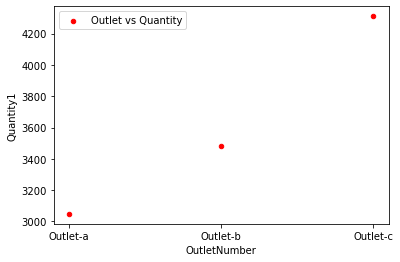

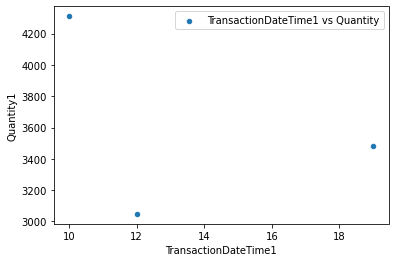

In [25]:
# Visual representation of data
ax = c2.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity')
c2.plot(kind = 'scatter', x = 'TransactionDateTime1', y = 'Quantity1', label = 'TransactionDateTime1 vs Quantity')

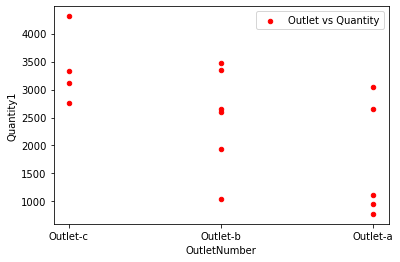

In [26]:
c.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity')

In [27]:
# Individual Trade Area Clustering
x = c2.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=2)

In [28]:
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)

[0 0 1]


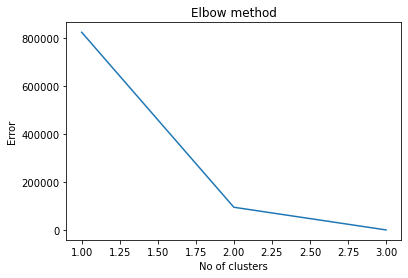

In [29]:
# Elbow Method to determine the number of clusters
Error =[]
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 4), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

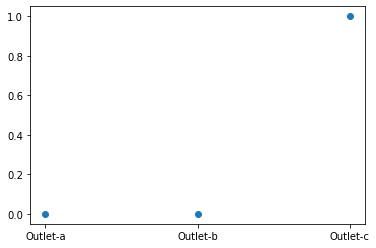

In [30]:
x1 = c2['OutletNumber']
y1 = y_kmeans
plt.scatter(x1, y1, cmap = 'rainbow') # clustered data plot of individual outlet

Text(0, 0.5, 'Time of Hour')

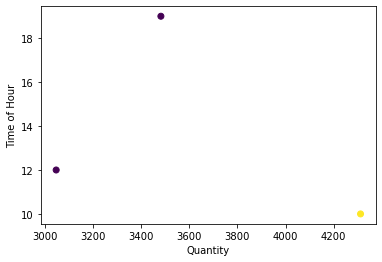

In [31]:
plt.scatter(x[:, 1], x[:, 2], c = y_kmeans)
plt.xlabel('Quantity')
plt.ylabel('Time of Hour')

In [32]:
print('****Outlet-a Median:', ota['Quantity1'].median()) # Individual Outlet Median
ota.head(5)

****Outlet-a Median: 1118.13


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-a,1,1118.13,18
1,Outlet-a,4,2651.41,18
2,Outlet-a,5,3047.78,12
3,Outlet-a,10,776.19,12
4,Outlet-a,11,955.73,0


In [33]:
print('****Outlet-b Median:', otb['Quantity1'].median()) # Individual Outlet Median
otb.head(6)

****Outlet-b Median: 2621.9900000000007


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
5,Outlet-b,2,2594.20,19
6,Outlet-b,3,1039.92,13
7,Outlet-b,6,3482.51,19
8,Outlet-b,7,1929.99,18
9,Outlet-b,9,3353.83,19
10,Outlet-b,11,2649.78,20


In [34]:
print('****Outlet-c Median:', otc['Quantity1'].median()) # Individual Outlet Median
otc.head(6)

****Outlet-c Median: 3222.200000000016


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
11,Outlet-c,1,3324.01,11
12,Outlet-c,2,3120.39,12
13,Outlet-c,4,4311.29,10
14,Outlet-c,11,2762.61,10
